In [52]:

import pandas as pd#Pandası import ediyoruz.
import numpy as np#Numpyı import ediyoruz.
import matplotlib#Matplotlibi import ediyoruz.
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,6)#Matplotlibin x-y eksenleri ölçülerini belirliyoruz.
data = {'a':[1,2,3,4,5,6,7,8,9,2,3,4,7,29,2,3,67,8,5,4,8,9,8,1,2,0,-1,-39,3,5,8,9,8,7,5,4,3,2,1,2],
        'b':[3,9,3,4,5,2,3,4,5,6,8,4,5,6,7,8,3,2,3,4,12,7,8,3,2,123,2,3,4,5,6,2,19,1,-10,3,4,5,6,3]}#A ve
#b değişkenlerinden oluşan verisetimizi giriyoruz. 

df = pd.DataFrame(data)#Verisetimizden bir dataframe oluşturuyoruz.

df#Dataframemimizi gözlemliyoruz.

,a,b
0,1,3
1,2,9
2,3,3
3,4,4
4,5,5
5,6,2
6,7,3
7,8,4
8,9,5
9,2,6


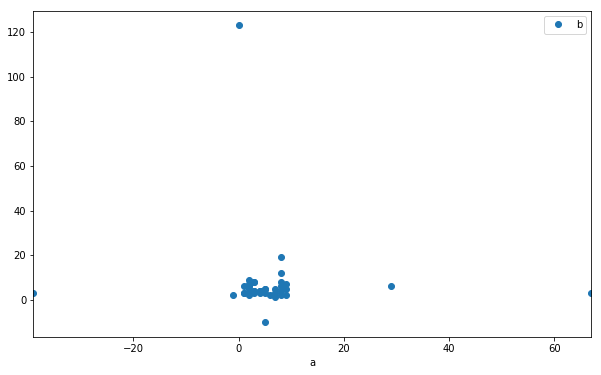

In [51]:
df.plot(x = "a", y = "b", style = "o")#scatter plot dağılım grafiği ile verisetimizin dağılımını 
#gözlemliyoruz.X eksenine a değişkenimizi,y eksenine b değişkenimizi,stilede o değerini giriyoruz. 

In [46]:
#Aykırı değerlerimize erişme işlemlerine geçiyoruz.
outliers = []#Aykırı değerlerimizi tutan bir matris oluşturuyoruz.
outliers_list= []#Aykırı değerlerimizi tutan başka bir matris oluşturuyoruz.

for feature in df.keys():#Her bir özellik (feature) için aykırı değerleri bir for döngüsü ile yakalıyoruz.
    Q1 = np.percentile(df[feature],25.)#birinci çeyrek değerimizi özelliğin %25.indexini alarak buluyoruz.
    Q3 = np.percentile(df[feature],75.)#üçüncü çeyrek değerimizi özelliğin %75.indexini alarak buluyoruz.

    step = (Q3-Q1)*1.5#aykırı adım değerimizi 3.çeyrek değerden 1.çeyrek değerin farkının 1.5 katını
    #alarak buluyoruz.

    outlier_feature = df[~((df[feature] > Q1 - step)&(df[feature] < Q3 + step))]#ilgili özellik için
    #aykırı değerleri, 1.çeyrek değerden aykırı adım değerinin çıkartılmasından büyük olanları ve 3.çeyrek
    #değere aykırı adım değerinin eklenmesinden küçük olanları alarak buluyoruz.

    outliers +=outlier_feature.index.tolist()#aykırı değere sahip satır indekslerini kaydediyoruz.
    
    outliers_list.append(list(outlier_feature.index))#aykırı değerleri kaydediyoruz.
    
    display(outlier_feature)#Aykırı değerleri gözlemliyoruz.

,a,b
13,29,6
16,67,3
27,-39,3


,a,b
20,8,12
25,0,123
32,8,19
34,5,-10


In [47]:
#Aykırı değerlerimizi silme işlemlerine geçiyoruz.
df = df.drop(df.index[outliers]).reset_index(drop = True)#Aykırı değerleri indexleri resetlediğimiz
#reset_index ve drop yani silme fonksiyonlarını kullanarak siliyoruz. 
df#Dataframemimizi gözlemliyoruz.

,a,b
0,1,3
1,2,9
2,3,3
3,4,4
4,5,5
5,6,2
6,7,3
7,8,4
8,9,5
9,2,6


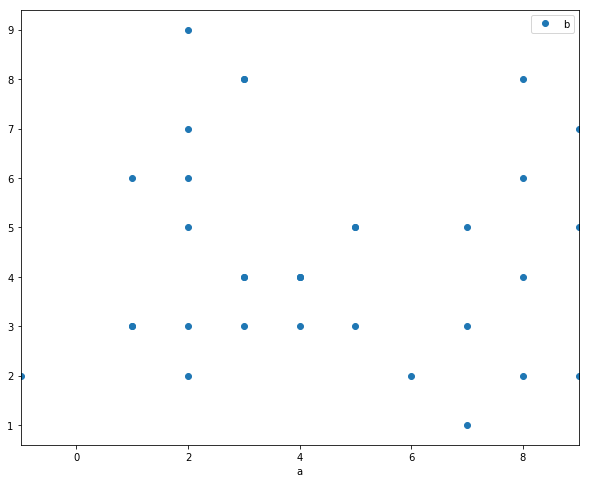

In [49]:
df.plot(x = "a", y = "b", style = "o")#scatter plot dağılım grafiği ile verisetimizin dağılımını tekrar  
#gözlemliyoruz.